In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_recall_curve, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier  # For ANN
import pickle
import joblib

In [178]:
df = pd.read_csv("D:\project 3\prp\python project\Data\main.csv")

In [179]:
df.head()

,emp_no,dept_no,dept_name,emp_title_id,title,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,salary
0,10001,d005,development,e0003,Senior Engineer,09-02-1953,Georgi,Facello,M,26-06-1986,9,C,1,30-07-1994,60117
1,10002,d007,Sales,s0001,Staff,06-02-1964,Bezalel,Simmel,F,21-11-1985,8,B,0,NaN,65828
2,10003,d004,Production,e0003,Senior Engineer,12-03-1959,Parto,Bamford,M,28-08-1986,1,C,0,NaN,40006
3,10004,d004,Production,e0003,Senior Engineer,05-01-1954,Chirstian,Koblick,M,12-01-1986,5,A,0,NaN,40054
4,10005,d003,Human Resources,s0001,Staff,21-01-1955,Kyoichi,Maliniak,M,09-12-1989,6,A,0,NaN,78228


In [180]:
#to find information about all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   emp_no                   331603 non-null  int64 
 1   dept_no                  331603 non-null  object
 2   dept_name                331603 non-null  object
 3   emp_title_id             331603 non-null  object
 4   title                    331603 non-null  object
 5   birth_date               331603 non-null  object
 6   first_name               331603 non-null  object
 7   last_name                331603 non-null  object
 8   sex                      331603 non-null  object
 9   hire_date                331603 non-null  object
 10  no_of_projects           331603 non-null  int64 
 11  Last_performance_rating  331603 non-null  object
 12  left                     331603 non-null  int64 
 13  last_date                33021 non-null   object
 14  salary              

In [181]:
#to find null values in each column 
df.isnull().sum()

emp_no                          0
dept_no                         0
dept_name                       0
emp_title_id                    0
title                           0
birth_date                      0
first_name                      0
last_name                       0
sex                             0
hire_date                       0
no_of_projects                  0
Last_performance_rating         0
left                            0
last_date                  298582
salary                          0
dtype: int64

In [182]:
df.duplicated().sum() #no duplicates under table level

0

In [183]:
#converting object datatype to datetime datatype
df['hire_date'] = pd.to_datetime(df['hire_date'], dayfirst=True)
df['birth_date'] = pd.to_datetime(df['birth_date'], dayfirst=True)
df['last_date'] = pd.to_datetime(df['last_date'], dayfirst=True)

In [184]:
cutoff_date = df['last_date'].max()

In [185]:
#creating tenure from last date and hire date 
df['tenure'] = np.where(df['last_date'].notna(), (df['last_date'] - df['hire_date']).dt.days // 365, 
                        (cutoff_date - df['hire_date']).dt.days // 365)

In [186]:
#creating age from last date and birth_date 
df['age'] = np.where(df['last_date'].notna(), (df['last_date'] - df['birth_date']).dt.days // 365, 
                        (cutoff_date - df['birth_date']).dt.days // 365)

In [187]:
#droping last_date column 
# df = df.drop(columns='last_date')

In [188]:
df['tenure'].max()

28.0

## univariate analysis

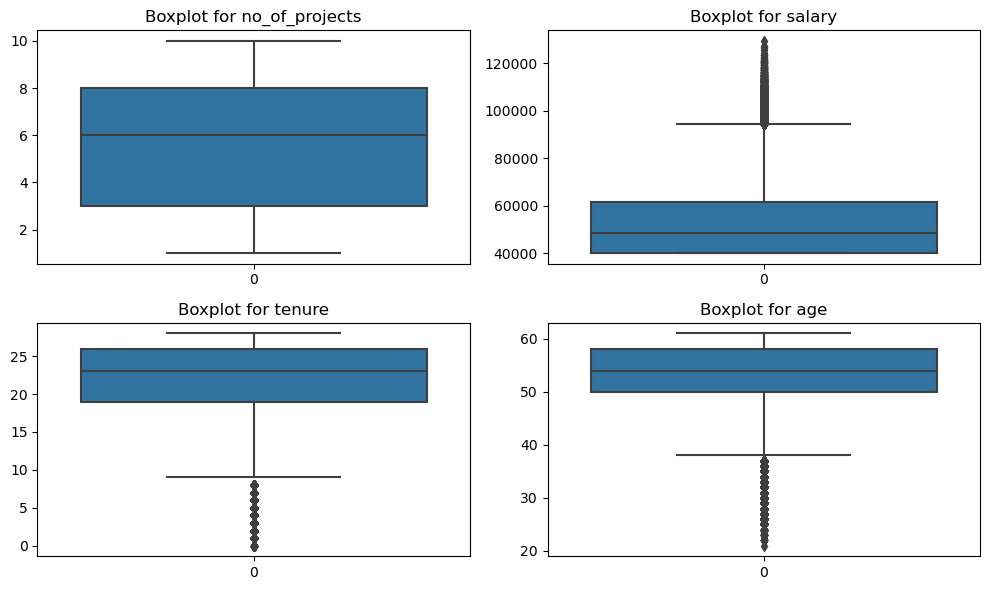

In [189]:
# Plot boxplots for numerical variables
plt.figure(figsize=(10, 6))
for i, col in enumerate(['no_of_projects','salary','tenure','age'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

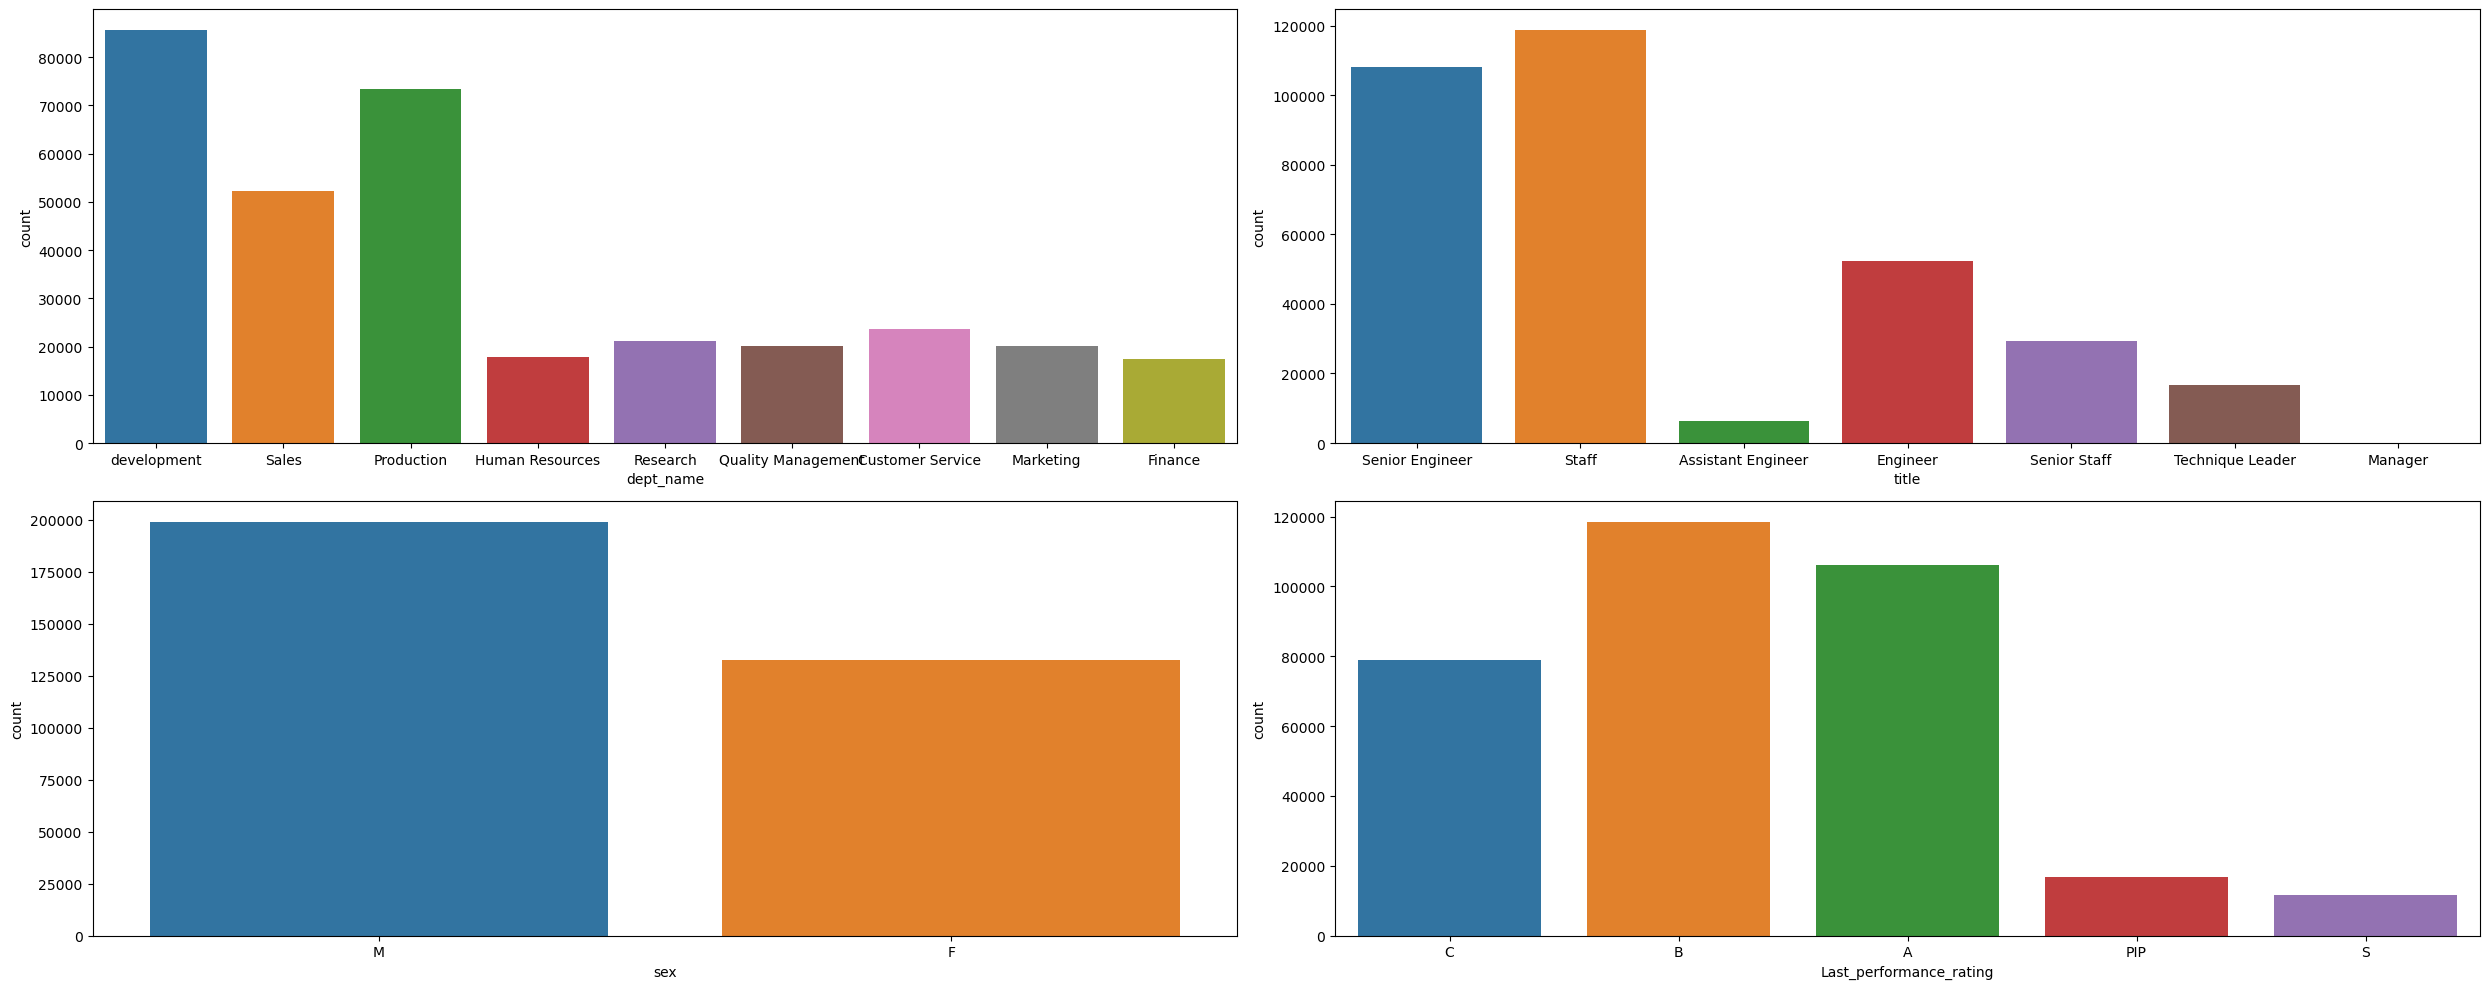

In [190]:
# Bar plots for categorical variables
plt.figure(figsize=(25, 10))
for i, col in enumerate(['dept_name', 'title', 'sex', 'Last_performance_rating'], 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

## Bivariate analysis

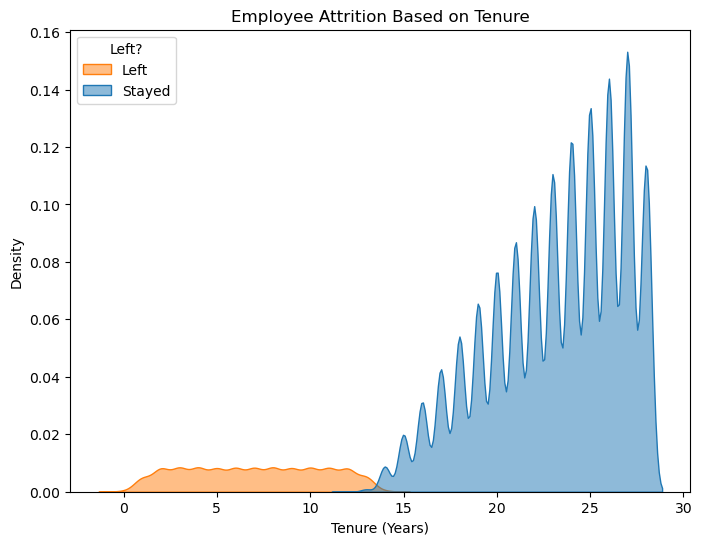

In [191]:
# Employee Attrition Based on Tenure
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="tenure", hue="left", fill=True, alpha=0.5)
plt.title("Employee Attrition Based on Tenure")
plt.xlabel("Tenure (Years)")
plt.ylabel("Density")
plt.legend(title="Left?", labels=["Left","Stayed"],loc='upper left')
plt.show()


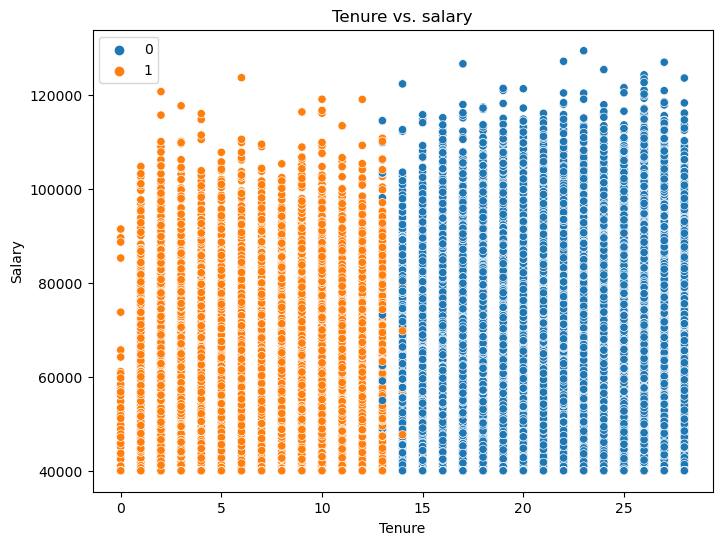

In [192]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tenure'],y=df['salary'],hue=df['left'])
plt.title("Tenure vs. salary")
plt.xlabel("Tenure")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Employees who left the organisation are mostly from initial years

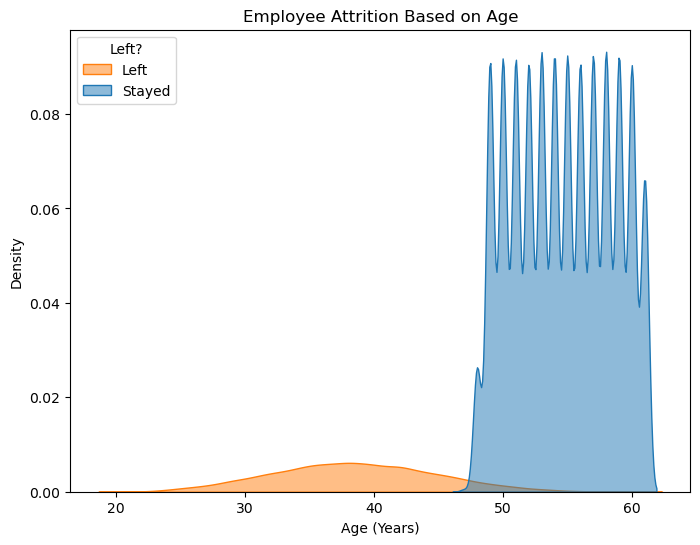

In [193]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="age", hue="left", fill=True, alpha=0.5)
plt.title("Employee Attrition Based on Age")
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.legend(title="Left?", labels=["Left","Stayed"],loc='upper left')
plt.show()

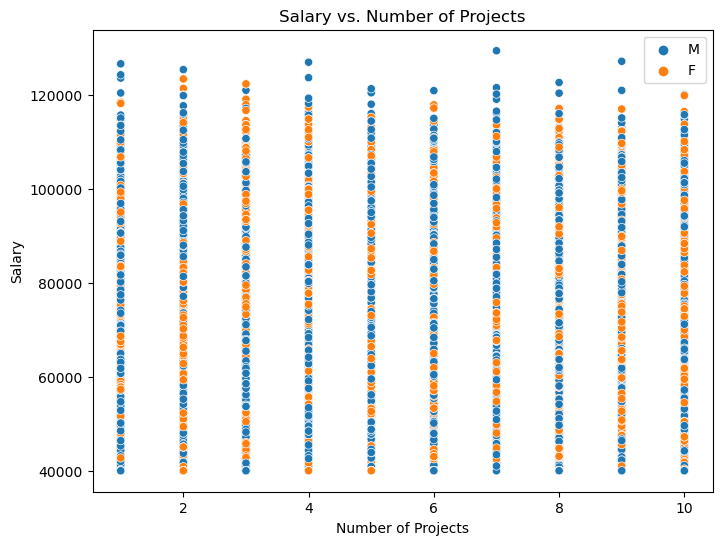

In [194]:
#Salary vs. Number of Projects
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['no_of_projects'],y=df['salary'],hue=df['sex'])
plt.title("Salary vs. Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Salary")
plt.legend()
plt.show()

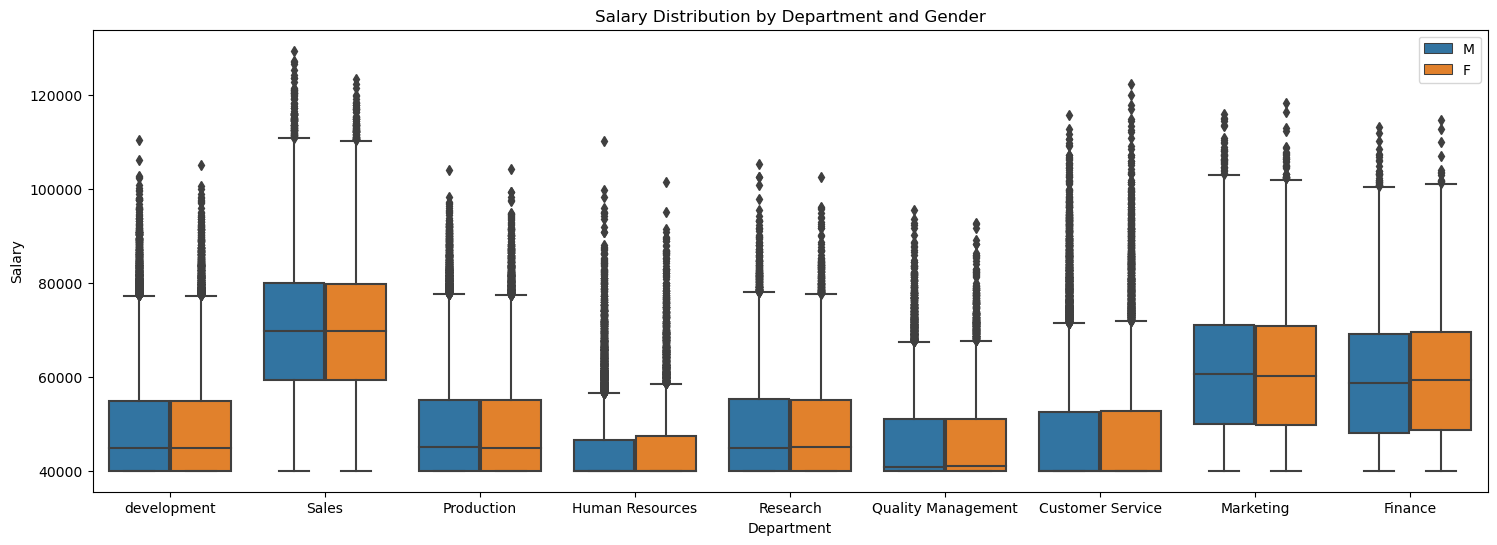

In [195]:
#Salary Distribution by Department and Gender
plt.figure(figsize=(18, 6))
sns.boxplot(x=df['dept_name'], y=df['salary'], hue=df['sex'])
plt.title("Salary Distribution by Department and Gender")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Highest  salary is for Sales department when compared to other departments

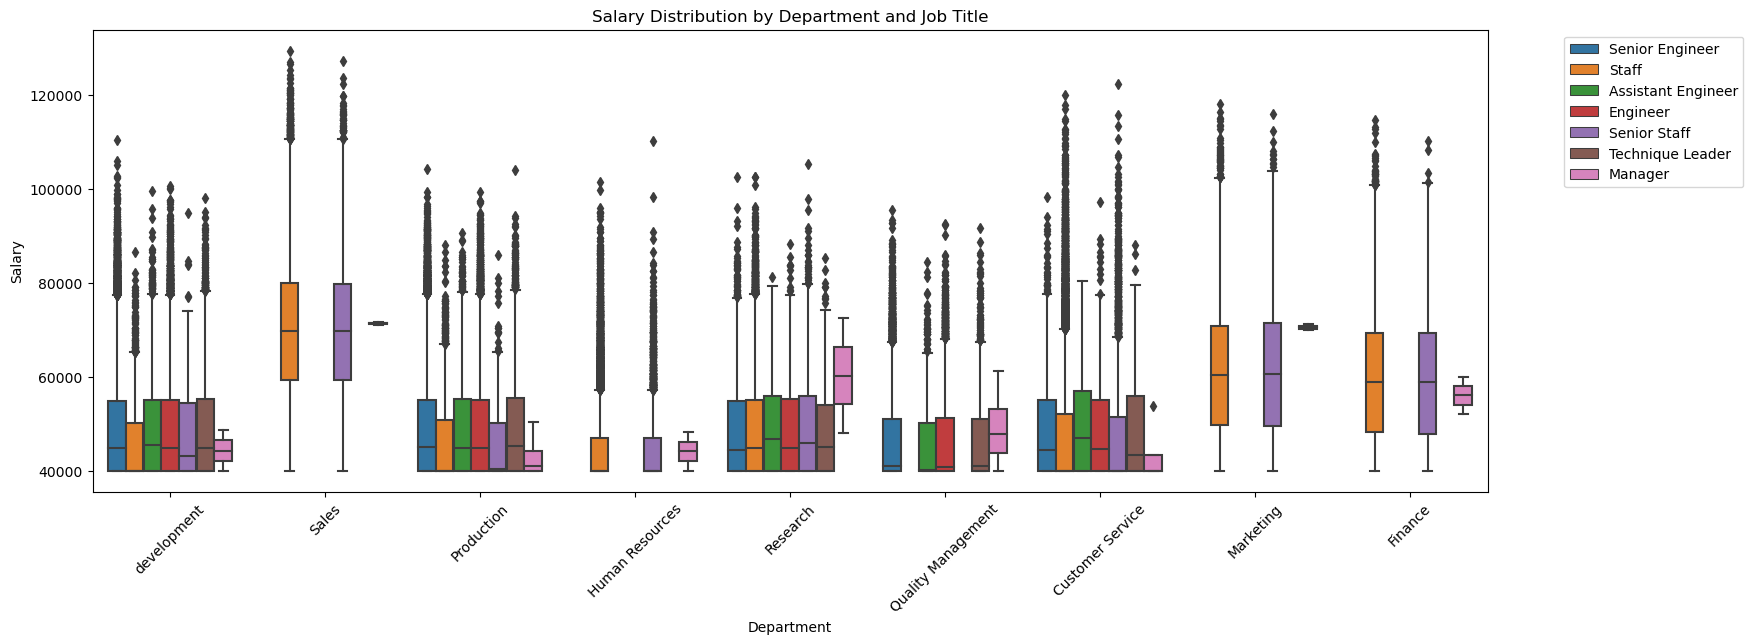

In [196]:
#Salary Distribution by Department and Job Title
plt.figure(figsize=(18, 6))
sns.boxplot(x=df['dept_name'], y=df['salary'], hue=df['title'])
plt.title("Salary Distribution by Department and Job Title")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [197]:
#create age_group bin
age_bins = [21, 29, 37, 46, 54, 62]

# Define labels for the bins
age_labels = ['21-28', '29-36', '37-45', '46-53', '54-61']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df['age_group']=df['age_group'].astype('object')

In [198]:
#create tenure_group bin
bins_tenure = [0, 6, 12, 18, 24, 30]

# Define labels for the bins
labels_tenure = ['0-5', '6-11', '12-17', '18-23','24-29']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins_tenure, labels=labels_tenure, right=False)

df['tenure_group']=df['tenure_group'].astype('object')

In [199]:
salary_bins = [40000,60000,80000,100000,130000]
salary_labels=['low', 'medium', 'high', 'very_high']
df['salary_bin'] = pd.cut(df['salary'], bins=salary_bins, labels=salary_labels,right=False)

df['salary_bin']=df['salary_bin'].astype('object')

## Defining features

In [200]:
# df.to_csv('full_dataset.csv', index=False)

In [201]:
# # Select 1,000 random records
# sample_df = df.sample(n=2000, random_state=42)  # random_state ensures reproducibility

# # Save to a new CSV file
# sample_df.to_csv('sample_1000_records.csv', index=False)

In [202]:
df.columns

Index(['emp_no', 'dept_no', 'dept_name', 'emp_title_id', 'title', 'birth_date',
       'first_name', 'last_name', 'sex', 'hire_date', 'no_of_projects',
       'Last_performance_rating', 'left', 'last_date', 'salary', 'tenure',
       'age', 'age_group', 'tenure_group', 'salary_bin'],
      dtype='object')

In [203]:
# Define features and target
features = ['no_of_projects', 'salary_bin', 'age_group', 'tenure_group', 
            'dept_name', 'title', 'sex', 'Last_performance_rating']

In [204]:
# Create and save category mapping
category_mapping = {}
for feature in features:
    if df[feature].dtype == 'object' :
        # Get sorted unique categories
        categories = sorted(df[feature].unique().tolist())
        category_mapping[feature] = categories

with open('category_mapping.pkl', 'wb') as f:
    pickle.dump(category_mapping, f)

In [205]:
# Encode categorical variables using pd.get_dummies()
df_encoded = pd.get_dummies(df[features], drop_first=True)

In [206]:
# Save model columns
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(df_encoded.columns.tolist(), f)

In [207]:
# Define X and y
X = df_encoded
y = df['left']

In [208]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42  # Add random_state for reproducibility
)

In [209]:
# Scale numerical features (optional but consistent)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [210]:
# Save scaler and test data
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [211]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))



In [212]:
# Function to evaluate and save model
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, model_name, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_probs))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    # Save the model
    with open(filename, 'wb') as f:
        pickle.dump(model, f)


## Logistic Regression


Logistic Regression Results:
Accuracy: 0.976156250942391
ROC-AUC: 0.9991501485404112

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     89585
           1       0.81      0.99      0.89      9896

    accuracy                           0.98     99481
   macro avg       0.91      0.98      0.94     99481
weighted avg       0.98      0.98      0.98     99481



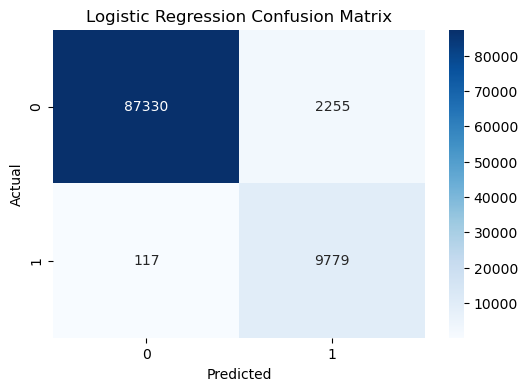

In [213]:
# 1. Logistic Regression
lr_model = LogisticRegression(
    class_weight=class_weights_dict,
    max_iter=1000,
    random_state=42
)
evaluate_and_save_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                       "Logistic Regression", "logistic_regression_model.pkl")

## XGBoost

c:\users\saite\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.9828509966727315
ROC-AUC: 0.9990406433302506

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     89585
           1       0.87      0.98      0.92      9896

    accuracy                           0.98     99481
   macro avg       0.93      0.98      0.95     99481
weighted avg       0.98      0.98      0.98     99481



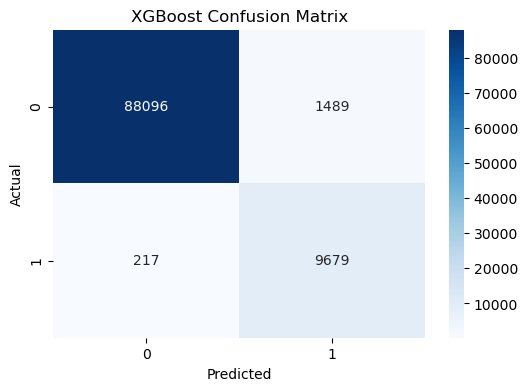

In [214]:
# 2. XGBoost
xgb_model = XGBClassifier(
    scale_pos_weight=class_weights_dict[1]/class_weights_dict[0],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
evaluate_and_save_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                       "XGBoost", "xgboost_model.pkl")

## Random Forest


Random Forest Results:
Accuracy: 0.9879574994220002
ROC-AUC: 0.9934149253932024

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     89585
           1       0.92      0.96      0.94      9896

    accuracy                           0.99     99481
   macro avg       0.96      0.98      0.97     99481
weighted avg       0.99      0.99      0.99     99481



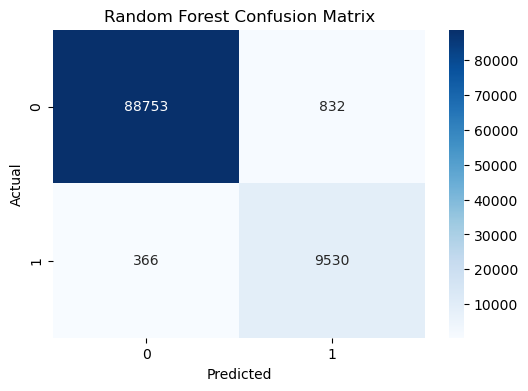

In [215]:
# 3. Random Forest
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42
)
evaluate_and_save_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                       "Random Forest", "random_forest_model.pkl")

## Artificial Neural Network (ANN)


ANN Results:
Accuracy: 0.9952553753983173
ROC-AUC: 0.9991434426434765

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     89585
           1       1.00      0.95      0.98      9896

    accuracy                           1.00     99481
   macro avg       1.00      0.98      0.99     99481
weighted avg       1.00      1.00      1.00     99481



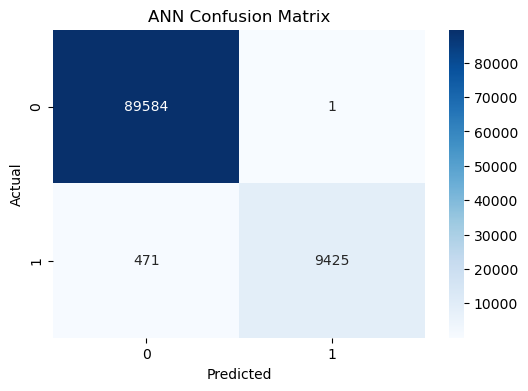

In [216]:
# 4. Artificial Neural Network (ANN)
ann_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10
)
evaluate_and_save_model(ann_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                       "ANN", "ann_model.pkl")